To import necessary libraries to inititalize and other libraries later as per requirement

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [244]:
#pip install openpyxl

In [245]:
#pip install pylint

In [246]:
df= pd.read_excel("C:\\Users\\hp\\Desktop\\odin_projects\\Health_insurance_cost.xlsx")

Variables in the dataset:

age: age of the primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

children: number of children covered by health insurance, number of dependents

smoker: smoking or not

region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

charges: individual medical costs billed by health insurance


INITIALLY : 
we have these null values in respective columns and we filled it later accordingly.

age                       28

gender                     0

BMI                       23

Children                   0

smoking_status             0

location                   0

health_insurance_price     2


DATA ANALYSIS APPROACH

In [247]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


to analyse data wrt normal distribution and skewness and outliers.

In [248]:
# Fill missing values based on skewness
df['age'].fillna(df['age'].median(), inplace=True)  # Skewness ~ 0.06, use median
df['BMI'].fillna(df['BMI'].mean(), inplace=True)    # Skewness ~ 0.3, use mean
df['health_insurance_price'].fillna(df['health_insurance_price'].median(), inplace=True)  # Skewness ~ 1.52, use median

C:\Users\hp\AppData\Local\Temp\ipykernel_16476\4174895411.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)  # Skewness ~ 0.06, use median
C:\Users\hp\AppData\Local\Temp\ipykernel_16476\4174895411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

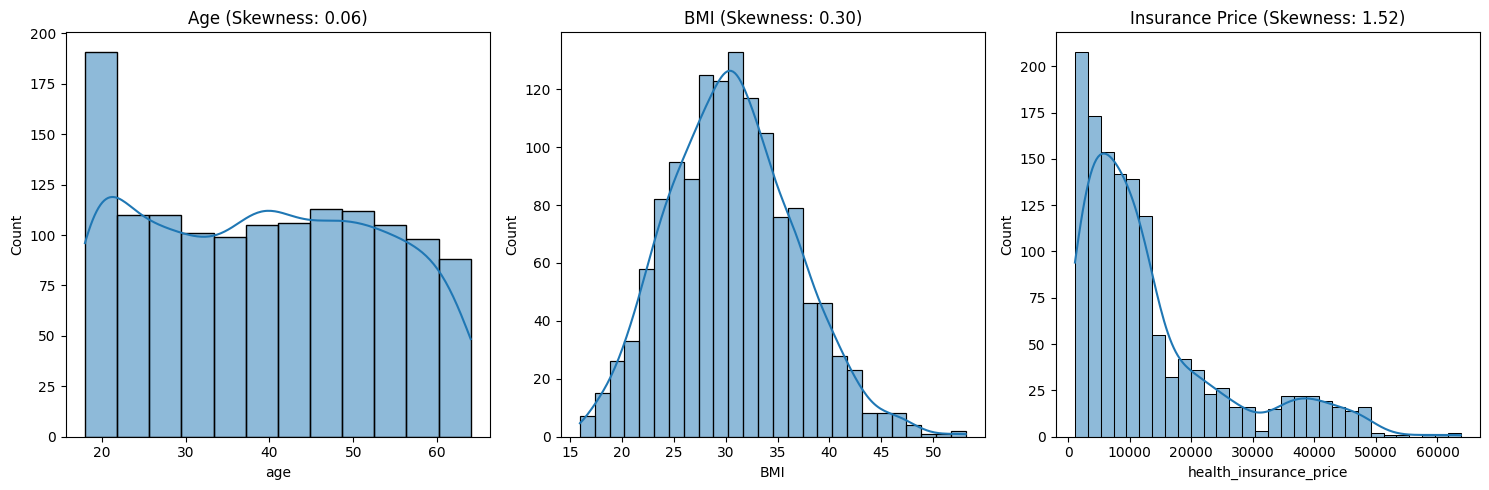

In [249]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram with KDE for 'age'
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title(f'Age (Skewness: {df["age"].skew():.2f})')

# Plot histogram with KDE for 'bmi'
sns.histplot(df['BMI'], kde=True, ax=axes[1])
axes[1].set_title(f'BMI (Skewness: {df["BMI"].skew():.2f})')

# Plot histogram with KDE for 'price'
sns.histplot(df['health_insurance_price'], kde=True, ax=axes[2])
axes[2].set_title(f'Insurance Price (Skewness: {df["health_insurance_price"].skew():.2f})')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

To perform EDA and finding some useful insights.

In [250]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520


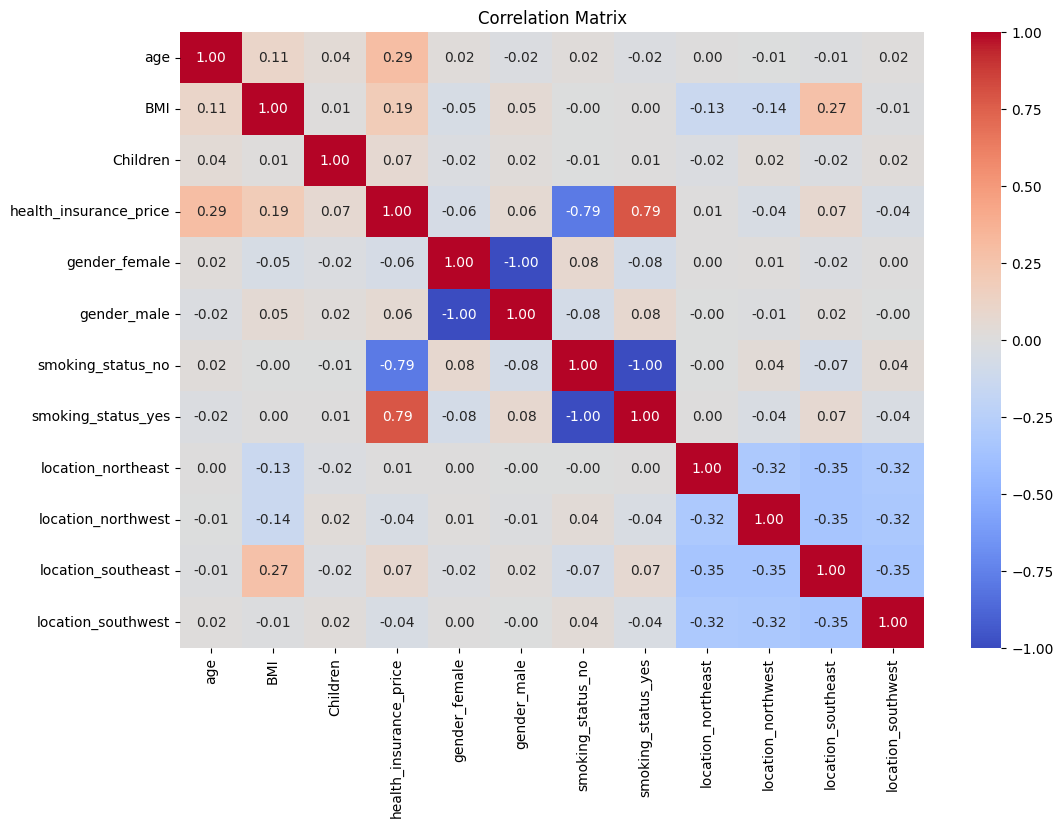

In [251]:
# Encode categorical variables for correlation analysis
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_status', 'location'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


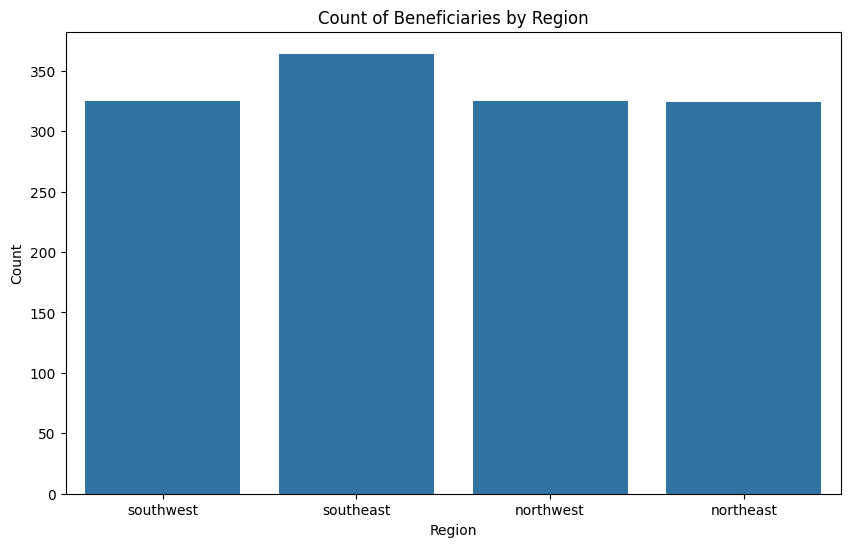

In [252]:
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df)
plt.title('Count of Beneficiaries by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


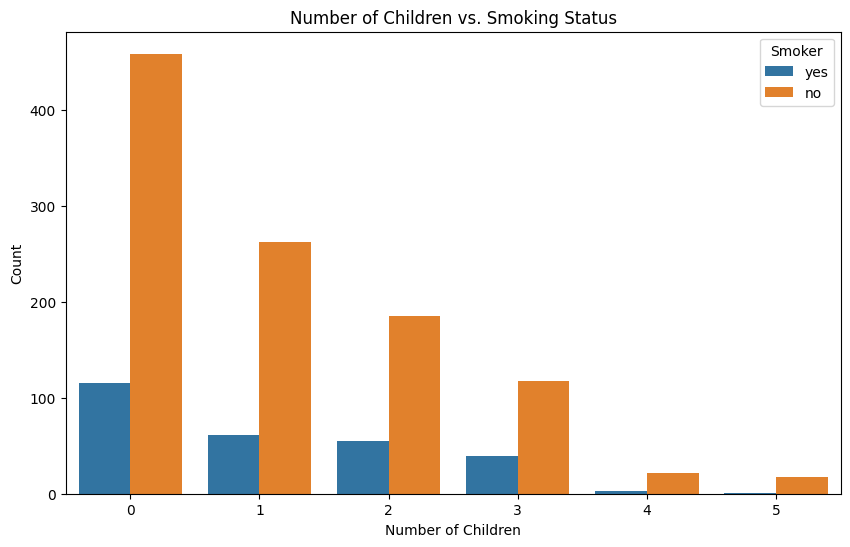

In [253]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Children', hue='smoking_status', data=df)
plt.title('Number of Children vs. Smoking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()


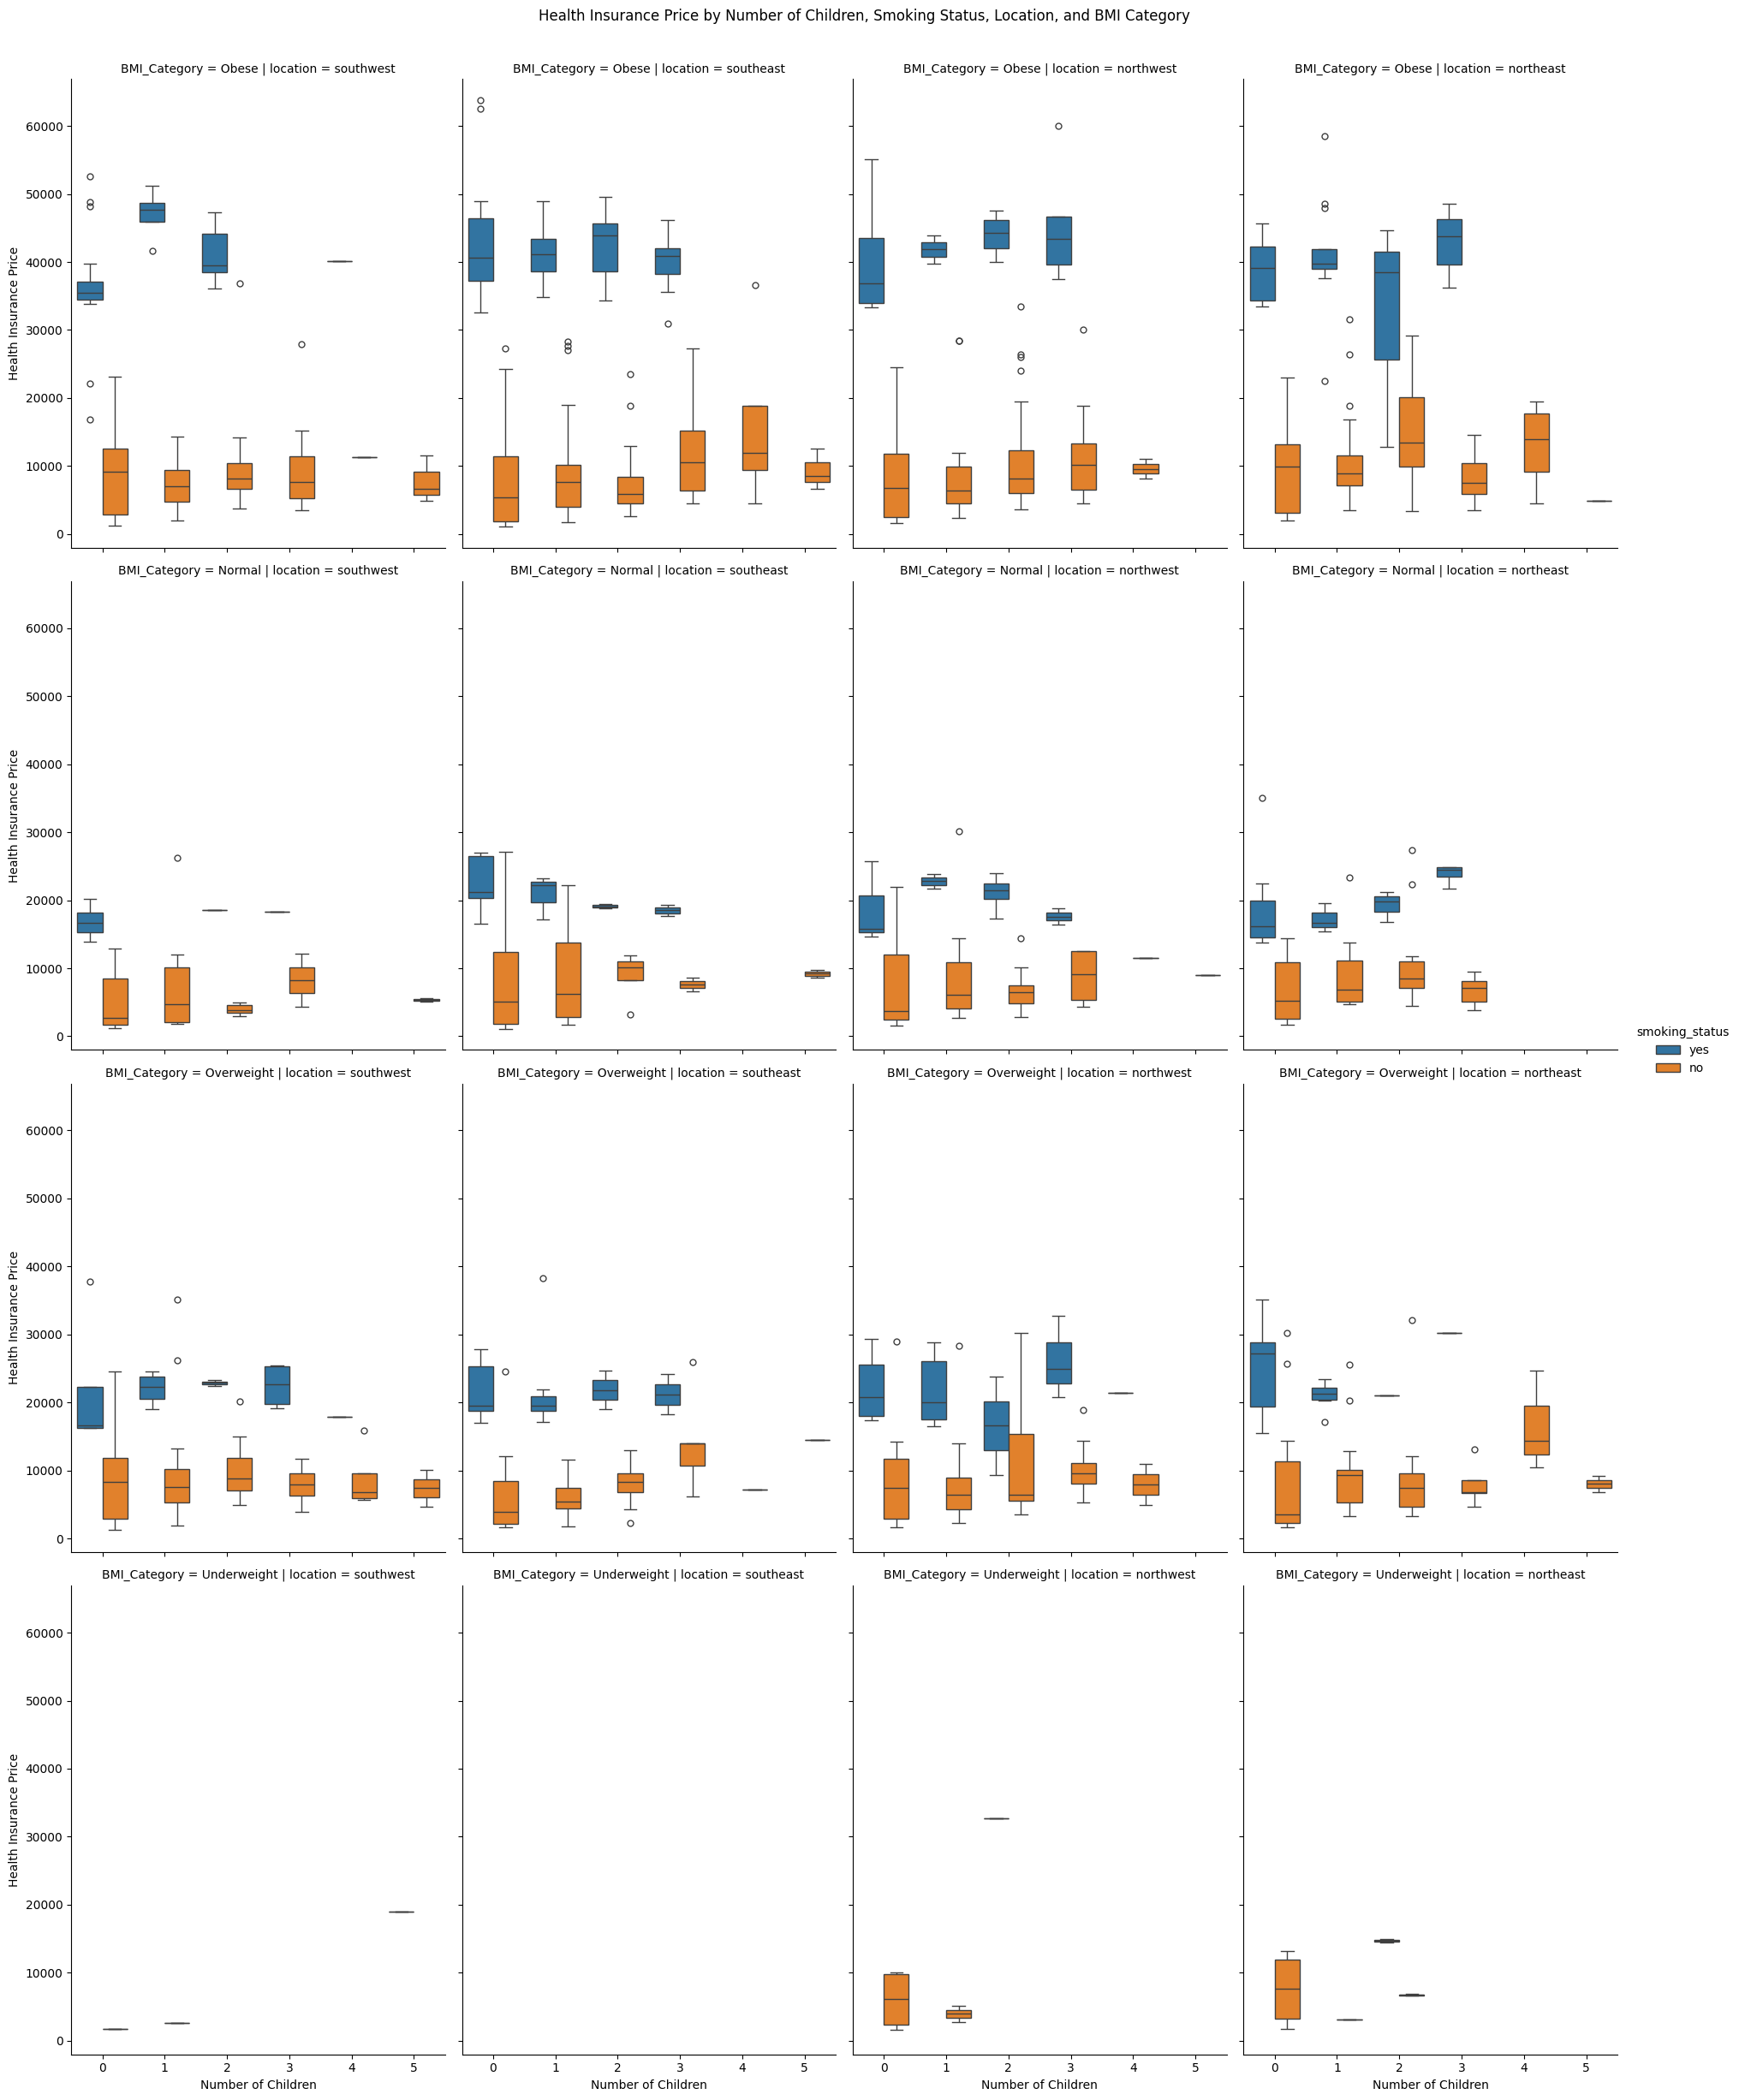

In [254]:
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

g = sns.catplot(
    x='Children', 
    y='health_insurance_price', 
    hue='smoking_status',  # Choose one hue
    col='location',  # Create separate plots for each region
    row='BMI_Category',  # Create rows for each BMI category
    data=df, 
    kind='box', 
    height=6, 
    aspect=0.8
)

g.set_axis_labels('Number of Children', 'Health Insurance Price')
g.fig.suptitle('Health Insurance Price by Number of Children, Smoking Status, Location, and BMI Category', y=1.02)
plt.show()


Inferences from heatmap and other graphs
1) with increase in age , health insurance price increases.
2) with increase in BMI  ,health insurance price increase somewhat.
3) its unusal that southeast people have more BMI than people in other regions making them a little more charged for insurances,
    thus they are availing more insurances than others .

4) if individual is a smoker, health insurance is charged more and vice versa.
5) Smokers are being charged up with high insurance price and smokers are having bearing less number of children than the non-smokers

6) It was seen a noticeable high price charged to some of northeern  non smokers  ,implying ehy  being somewhat of OBESE and OVERWEIGHT people  from outliers. 

To formulate some of the hypotheses from above inferences:

In [255]:
#H1: Age and Health Insurance Price
from scipy.stats import pearsonr

# Calculate Pearson correlation between Age and Health Insurance Price
correlation, p_value = pearsonr(df['age'], df['health_insurance_price'])

# Print the results with clearer formatting
print(f'Pearson Correlation between Age and Health Insurance Price:')
print(f'Correlation Coefficient: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

# Decision based on p-value
if p_value < 0.05:
    print("There is a significant correlation between Age and Health Insurance Price.")
else:
    print("There is no significant correlation between Age and Health Insurance Price.")


Pearson Correlation between Age and Health Insurance Price:
Correlation Coefficient: 0.2944
P-value: 0.0000
There is a significant correlation between Age and Health Insurance Price.


In [256]:
#H2: BMI and Health Insurance Price
from scipy.stats import pearsonr

# Calculate Pearson correlation between BMI and health insurance price
correlation, p_value = pearsonr(df['BMI'], df['health_insurance_price'])

# Print the results with clearer formatting
print(f'Pearson Correlation between BMI and Health Insurance Price:')
print(f'Correlation Coefficient: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

# Decision based on p-value
if p_value < 0.05:
    print("There is a significant correlation between BMI and health insurance price.")
else:
    print("There is no significant correlation between BMI and health insurance price.")


Pearson Correlation between BMI and Health Insurance Price:
Correlation Coefficient: 0.1945
P-value: 0.0000
There is a significant correlation between BMI and health insurance price.


In [257]:
#H3: Regional Differences in BMI
from scipy.stats import f_oneway

# Grouping BMI by region
groups = [group['BMI'].values for name, group in df.groupby('location')]

# Performing ANOVA
f_statistic, p_value = f_oneway(*groups)

# Printing the results
print(f'F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}')

# Making a decision based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in BMI across different regions.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in BMI across different regions.")


F-statistic: 38.6157, p-value: 0.0000
Reject the null hypothesis: There are significant differences in BMI across different regions.


In [258]:
#H4: Smoking Status and Health Insurance Price
from scipy.stats import ttest_ind

# Extracting health insurance prices for smokers and non-smokers
smokers = df[df['smoking_status'] == 'yes']['health_insurance_price']
non_smokers = df[df['smoking_status'] == 'no']['health_insurance_price']

# Performing the independent t-test
t_statistic, p_value = ttest_ind(smokers, non_smokers)

# Printing the results
print(f'T-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}')

# Making a decision based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in health insurance prices between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in health insurance prices between smokers and non-smokers.")



T-statistic: 46.4092, p-value: 0.0000
Reject the null hypothesis: There is a significant difference in health insurance prices between smokers and non-smokers.


In [259]:
#H5: Impact of Children on Health Insurance Price
from scipy.stats import f_oneway

# Grouping the data by the number of children and extracting health insurance prices
groups = [group['health_insurance_price'].values for name, group in df.groupby('Children')]

# Performing ANOVA
f_statistic, p_value = f_oneway(*groups)

# Printing the results
print(f'F-statistic: {f_statistic}, p-value: {p_value}')

# Making a decision based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in health insurance prices based on the number of children.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in health insurance prices based on the number of children.")



F-statistic: 3.217765974492355, p-value: 0.0068143792710820975
Reject the null hypothesis: There is a significant difference in health insurance prices based on the number of children.


In [260]:
#H6: Relationship Between Smoking Status and Number of Children
smokers_children = df[df['smoking_status'] == 'yes']['Children']
non_smokers_children = df[df['smoking_status'] == 'no']['Children']
t_statistic, p_value = ttest_ind(smokers_children, non_smokers_children)
print(f'T-statistic: {t_statistic}, p-value: {p_value}')

# Making a decision based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of children between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of children between smokers and non-smokers.")


T-statistic: 0.2804710381227759, p-value: 0.7791595656720584
Fail to reject the null hypothesis: There is no significant difference in the number of children between smokers and non-smokers.


In [261]:
#pip install statsmodels


In [262]:
import statsmodels.api as sm
from scipy.stats import ttest_ind

# Create a binary feature: is_northern_non_smoker
df['is_northern_non_smoker'] = ((df['location'] == 'northeast') & (df['smoking_status'] == 'no')).astype(int)

# Define independent variables (features) and dependent variable (target)
X = df[['age', 'BMI', 'Children', 'is_northern_non_smoker']]
Y = df['health_insurance_price']

# Add a constant term to the independent variables to include the intercept in the model
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression results
print("OLS Regression Results Summary:")
print(model.summary())
print()
# Decision based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in health insurance prices due to outliers in northern non-smokers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in health insurance prices due to outliers in northern non-smokers.")


OLS Regression Results Summary:
                              OLS Regression Results                              
Dep. Variable:     health_insurance_price   R-squared:                       0.139
Model:                                OLS   Adj. R-squared:                  0.136
Method:                     Least Squares   F-statistic:                     53.81
Date:                    Fri, 27 Sep 2024   Prob (F-statistic):           4.43e-42
Time:                            12:26:16   Log-Likelihood:                -14377.
No. Observations:                    1338   AIC:                         2.876e+04
Df Residuals:                        1333   BIC:                         2.879e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

Inferences wrt  above hypothesis testing:

1)  Significant Correlation Between Age and Health Insurance Price:
Inference: As individuals age, the cost of health insurance tends to increase. This could be due to higher health risks associated with older age groups.

2)  Significant Correlation Between BMI and Health Insurance Price:
Inference: Higher Body Mass Index (BMI) is associated with increased health insurance costs. This suggests that individuals with higher BMI may have higher health risks, leading to higher insurance premiums.

3)  Significant Differences in BMI Across Regions:
Inference: Different regions show varying average BMI levels, indicating that regional health behaviors or environmental factors might influence body weight. This could affect health insurance pricing strategies across regions.

4)  Significant Difference in Health Insurance Prices Between Smokers and Non-Smokers:
Inference: Smokers are charged higher health insurance premiums compared to non-smokers. This reflects the increased health risks and medical costs associated with smoking.

5)  Significant Difference in Health Insurance Prices Based on the Number of Children:
Inference: Families with more children tend to have higher health insurance costs. This might reflect the increased coverage needs for dependents in family insurance plans.

6)  No Significant Difference in the Number of Children Between Smokers and Non-Smokers:
Inference: The number of children in families is statistically similar regardless of smoking status. This suggests that smoking behavior does not significantly influence family size decisions.

7)  Significant Difference in Health Insurance Prices in Northern Non-Smokers:
Inference: Maybe due to geographical area , obesity or any other factor Northern some Non- smokers are being charged more

data analysis approach.

 Till now initial sights have been analysed, and missing values are imputed accordingly.

 as per the insights hypothesis testing has been done wrt P-values and ANOVA testing so as to get statistical backup.

To performe ML operations it is recommended to split data to avoid data leakage while predictions later on.

In [263]:
X= df.iloc[ : , 0:6]
Y =df.iloc[ : , 6]

In [264]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [265]:
X

,age,gender,BMI,Children,smoking_status,location
0,19.0,female,30.638217,0,yes,southwest
1,18.0,male,33.770000,1,no,southeast
2,28.0,male,33.000000,3,no,southeast
3,33.0,male,22.705000,0,no,northwest
4,32.0,male,28.880000,0,no,northwest
...,...,...,...,...,...,...
1333,50.0,male,30.970000,3,no,northwest
1334,18.0,female,31.920000,0,no,northeast
1335,18.0,female,36.850000,0,no,southeast
1336,21.0,female,25.800000,0,no,southwest


In [266]:
# Convert Y_train into a DataFrame with the column name 'health_insurance_price'
Y_train_df = pd.DataFrame(Y_train, columns=['health_insurance_price'])
Y_train_df

,health_insurance_price
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [267]:
Y_train.isnull().sum()

0

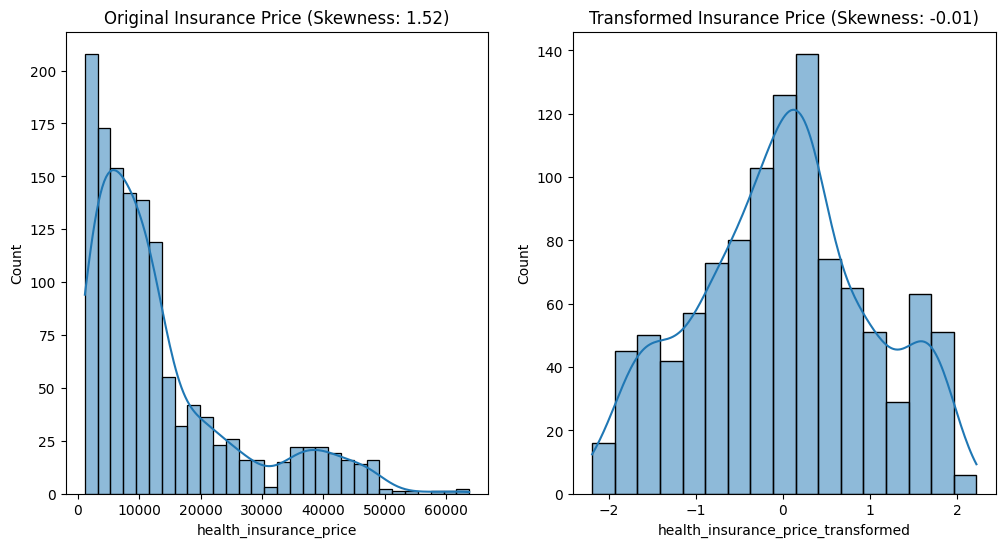

In [268]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize PowerTransformer with Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the training data (need to pass as 2D array or DataFrame)
Y_train_transformed = pt.fit_transform(Y_train_df[['health_insurance_price']])

# Convert the result back to a DataFrame for easier handling
Y_train_transformed = pd.DataFrame(Y_train_transformed, columns=['health_insurance_price_transformed'])

# Apply the same transformation to the test set
# X_test_transformed = pt.transform(X_test[['health_insurance_price']])

# Plotting original vs. transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original health insurance price distribution
sns.histplot(df['health_insurance_price'], kde=True, ax=axes[0])
axes[0].set_title(f'Original Insurance Price (Skewness: {df["health_insurance_price"].skew():.2f})')

# Transformed health insurance price distribution
sns.histplot(Y_train_transformed['health_insurance_price_transformed'], kde=True, ax=axes[1])
axes[1].set_title(f'Transformed Insurance Price (Skewness: {Y_train_transformed["health_insurance_price_transformed"].skew():.2f})')

plt.show()


In [269]:
df.shape

(1338, 9)

#initial modelling before feature engineering  1) BASIC LINEAR REGRESSION

In [288]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the feature set (X) and target variable (Y)
X1 = df[['age', 'BMI', 'Children']]  # Include relevant features
Y1 = df['health_insurance_price']  # Target variable

# Split the data into training and testing sets
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_lr, Y_train_lr)

# Make predictions on the test set
Y_pred_lr = lr.predict(X_test_lr)

# Evaluate the model performance
mse = mean_squared_error(Y_test_lr, Y_pred_lr)
r2 = r2_score(Y_test_lr, Y_pred_lr)


print(f'R-squared: {r2:.2f}')

# Optionally, print the coefficients to understand the impact of each feature
coefficients = pd.DataFrame(lr.coef_, X1.columns, columns=['Coefficient'])
print(coefficients)


R-squared: 0.15
          Coefficient
age        217.787269
BMI        338.420613
Children   560.131730


In [271]:
#X1 = df[['age', 'BMI', 'Children','location', 'smoking_status' ,'gender' ,'BMI_Category']] 

Now some feature engineering like one hot encoding, standard scaler, boruta etc to improve accuracy.

In [272]:
X_new_1= df[["age", 'gender' ,'BMI', 'BMI_Category','Children' , 'smoking_status' ,'location' ]]
X_new_1

,age,gender,BMI,BMI_Category,Children,smoking_status,location
0,19.0,female,30.638217,Obese,0,yes,southwest
1,18.0,male,33.770000,Obese,1,no,southeast
2,28.0,male,33.000000,Obese,3,no,southeast
3,33.0,male,22.705000,Normal,0,no,northwest
4,32.0,male,28.880000,Overweight,0,no,northwest
...,...,...,...,...,...,...,...
1333,50.0,male,30.970000,Obese,3,no,northwest
1334,18.0,female,31.920000,Obese,0,no,northeast
1335,18.0,female,36.850000,Obese,0,no,southeast
1336,21.0,female,25.800000,Overweight,0,no,southwest


To get OHE  on categorical features that may impact the accuracy

In [273]:


# Ensure that categorical columns are of type 'category' before applying get_dummies
X_new_1['gender'] = X_new_1['gender'].astype('category')
X_new_1['location'] = X_new_1['location'].astype('category')
X_new_1['BMI_Category'] = X_new_1['BMI_Category'].astype('category')
X_new_1['smoking_status'] = X_new_1['smoking_status'].astype('category')

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(X_new_1, columns=['gender', 'location', 'BMI_Category', 'smoking_status'], drop_first=True)

# Display the first few rows of the transformed DataFrame
print(df_encoded.head())


    age        BMI  Children  gender_male  location_northwest  \
0  19.0  30.638217         0        False               False   
1  18.0  33.770000         1         True               False   
2  28.0  33.000000         3         True               False   
3  33.0  22.705000         0         True                True   
4  32.0  28.880000         0         True                True   

   location_southeast  location_southwest  BMI_Category_Obese  \
0               False                True                True   
1                True               False                True   
2                True               False                True   
3               False               False               False   
4               False               False               False   

   BMI_Category_Overweight  BMI_Category_Underweight  smoking_status_yes  
0                    False                     False                True  
1                    False                     False               F

C:\Users\hp\AppData\Local\Temp\ipykernel_16476\946283191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new_1['gender'] = X_new_1['gender'].astype('category')
C:\Users\hp\AppData\Local\Temp\ipykernel_16476\946283191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new_1['location'] = X_new_1['location'].astype('category')
C:\Users\hp\AppData\Local\Temp\ipykernel_16476\946283191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

2) LINEAR REGRESSION on encoded data

In [274]:
# linear regression  again 
#X_new_1, Y
X1 = df_encoded # Include relevant features
Y1 = Y  # Target variable

# Split the data into training and testing sets
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_lr, Y_train_lr)

# Make predictions on the test set
Y_pred_lr = lr.predict(X_test_lr)

# Evaluate the model performance
mse = mean_squared_error(Y_test_lr, Y_pred_lr)
r2 = r2_score(Y_test_lr, Y_pred_lr)


print(f'R-squared: {r2:.2f}')

# Optionally, print the coefficients to understand the impact of each feature
coefficients = pd.DataFrame(lr.coef_, X1.columns, columns=['Coefficient'])
print(coefficients)

R-squared: 0.77
                           Coefficient
age                         252.429037
BMI                          99.954625
Children                    410.625027
gender_male                  41.216876
location_northwest         -458.649149
location_southeast         -511.856853
location_southwest         -842.373286
BMI_Category_Obese         3537.596529
BMI_Category_Overweight     338.473432
BMI_Category_Underweight  -1576.305881
smoking_status_yes        23519.900345


In [275]:
#pip install boruta

3) RANDOMFORESTREGRESSOR for boruta

In [276]:

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# Assuming 'df_encoded' is your feature set and 'Y' is the target variable
X = df_encoded.values  # Convert to numpy array
Y = Y.values  # Convert target to numpy array

# Initialize a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize Boruta feature selection
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)

# Fit Boruta to the data
boruta_selector.fit(X, Y)

# Get the mask of the selected features
selected_features = boruta_selector.support_

# Create a new DataFrame with the selected features
df_selected = df_encoded.iloc[:, selected_features]

# Display the selected features
print(f"Selected Features: {df_encoded.columns[selected_features].tolist()}")

# You can now use df_selected for further analysis or modeling


Selected Features: ['age', 'BMI', 'smoking_status_yes']


In [277]:
X1 = df_encoded[['age', 'BMI', 'smoking_status_yes']]  # Include relevant features
Y1 = Y  # Target variable

# Split the data into training and testing sets
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_lr, Y_train_lr)

# Make predictions on the test set
Y_pred_lr = lr.predict(X_test_lr)

# Evaluate the model performance
mse = mean_squared_error(Y_test_lr, Y_pred_lr)
r2 = r2_score(Y_test_lr, Y_pred_lr)


print(f'R-squared: {r2:.2f}')

# Optionally, print the coefficients to understand the impact of each feature
coefficients = pd.DataFrame(lr.coef_, X1.columns, columns=['Coefficient'])
print(coefficients)

R-squared: 0.77
                     Coefficient
age                   255.659463
BMI                   324.514786
smoking_status_yes  23552.524239


In [278]:
df_encoded

,age,BMI,Children,gender_male,location_northwest,location_southeast,location_southwest,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,smoking_status_yes
0,19.0,30.638217,0,False,False,False,True,True,False,False,True
1,18.0,33.770000,1,True,False,True,False,True,False,False,False
2,28.0,33.000000,3,True,False,True,False,True,False,False,False
3,33.0,22.705000,0,True,True,False,False,False,False,False,False
4,32.0,28.880000,0,True,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970000,3,True,True,False,False,True,False,False,False
1334,18.0,31.920000,0,False,False,False,False,True,False,False,False
1335,18.0,36.850000,0,False,False,True,False,True,False,False,False
1336,21.0,25.800000,0,False,False,False,True,False,True,False,False


4) POLYNOMIAL FEATURES

In [279]:
from sklearn.preprocessing import PolynomialFeatures
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_encoded, Y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures with the desired degree (e.g., degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_poly = poly.transform(X_test)

# Initialize a linear regression model
model = LinearRegression()

# Train the model with polynomial features
model.fit(X_train_poly, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test_poly)

# Evaluate the model using R-squared
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")


R-squared: 0.8679555423586249


POLYNOMIAL FEATURES WITH DEGREE= 2 AND LASSO regularization to avoid overfitting

In [289]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded  # Your encoded features
Y = Y # Target variable

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)  # Change degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Scale the features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)
# Initialize Ridge Regression
ridge_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Fit the model on the training data
ridge_model.fit(X_train_poly_scaled, Y_train)

# Make predictions on the test set
Y_pred = ridge_model.predict(X_test_poly_scaled)


# Evaluate performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Y.shape

Mean Squared Error: 20392933.67
R-squared: 0.87


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+09, tolerance: 1.543e+07
  model = cd_fast.enet_coordinate_descent(


(1338,)

5) TO check further with SVR 

In [285]:
from sklearn.svm import SVR
# Assuming df_encoded contains your one-hot encoded features
X = df_encoded  # Your encoded features
Y = df['health_insurance_price']  # Target variable

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).flatten()
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust parameters as needed

# Fit the model on the training data
svr_model.fit(X_train_scaled, Y_train_scaled)
# Make predictions on the test set
Y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse transform to get actual predictions
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
# Evaluate performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 21568902.40
R-squared: 0.86


In [286]:
pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


6) Implementing XGBoost with gridsearch parameter to ensure best hyperparameters for better accuracy

In [287]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_encoded contains your one-hot encoded features
X = df_encoded  # Your encoded features
Y = df['health_insurance_price']  # Target variable
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [3, 4, 5],      # Depth of trees
    'learning_rate': [0.01, 0.1], # Step size shrinkage
    'subsample': [0.8, 1.0],      # Proportion of samples used for fitting individual base learners
    'colsample_bytree': [0.8, 1.0] # Proportion of features used for training
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, 
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_


# Make predictions on the test set
Y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mean Squared Error: 19976464.52
R-squared: 0.87


7) TO check with DECISION TREE

In [290]:
from sklearn.tree import DecisionTreeRegressor
# Assuming df_encoded contains your one-hot encoded features
X = df_encoded  # Your encoded features
Y = df['health_insurance_price']  # Target variable
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
# Make predictions on the test set
Y_pred = dt_model.predict(X_test)
# Evaluate performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions using the best model
Y_pred = best_dt_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 39235875.72
R-squared: 0.75
Mean Squared Error: 21642032.67
R-squared: 0.86



Summary of Findings

Initial Linear Regression:
R² Score: 0.15 (indicating poor fit).

Feature Engineering:
Improved R² Score to 0.77 after adding new features, indicating a much better model fit.

Polynomial Features with Lasso Regularization:
Achieved R² Score: 0.87, showcasing the benefits of capturing non-linear relationships and controlling for overfitting through regularization.

Support Vector Regression (SVR):
Accuracy: 0.86, indicating robust performance, though SVR can be sensitive to the choice of kernel and parameters.

XGBoost:
R² Score: 0.87, similar to polynomial regression results, but noted for longer training times and increased complexity with larger datasets.

Decision Tree Regression:
Tuned hyperparameters to achieve an R² Score: 0.86, reflecting a good fit but with potential for overfitting if not controlled.

Conclusion and Recommendation:

Given that you achieved similar performance levels with multiple models (polynomial regression, SVR, and Decision Trees) but noted the high computational cost and time complexity of XGBoost, 

Best Model Selection:

Polynomial Regression with Lasso Regularization or SVR could be considered as the best options. Both provide a strong balance between performance and computational efficiency.


QUESTIONS TO BE ANSWERED:
Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?  

Accurate prediction of health insurance costs is essential for promoting efficiency, fairness, and sustainability in the healthcare system. It enables stakeholders—insurers, consumers, and policymakers—to make informed decisions, ultimately leading to better health outcomes and a more resilient healthcare infrastructure. As the industry continues to evolve, leveraging data analytics and predictive modeling will be crucial in addressing the challenges posed by rising healthcare costs and changing demographics.


If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?


1) lack of data like specific health conditions, or anybodies lifestyle  , demographic data like where is he living , is the environmental conditions good where he/she living
, what job is he in. stress levels with respect to stress indicators.
Proposed method:  giving weightage to anyones lifestyle and environment conditions and stress level being monitored via devices and using all other reports to make predictions.

2) Rather predictiong the insurance prices from traditional and nominal methods , we should try predictive modelling techniques on the basis of annual or semi annual health     monitoring of the person

3) The correlation between different factors are underestimated, 
    which can be overcome by having a holistic approach to different insurance domains  For example, how health factors influence life insurance costs or how geographic data impacts home insurance pricing.

4) Regulatory and Compliance challenges while setting premiums for insurers. that can be overcome by a transparent predictive  modelling approach while maintaining fairness in premium pricing. 

5) integration of life and health insurances:  this can help insurers to safeguard themselves as well as their family  and the insurance company too to avoid any false insurance claimers